Random forest classification used for cell type annotation.
(1) Reference dataset for pancreatic cells downloaded from cellxgene website (2) query dataset used from NCBI study (SRR31385601)

Random forrest classifier trained on the Reference dataset, then applied to query dataset for cell type classification.

In [1]:
pip install scikit-learn -q

In [2]:
import pandas as pd

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [5]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [6]:
import numpy as np

Modelling

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [8]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [9]:
from scipy.stats import randint

Tree Visualisation

In [10]:
from sklearn.tree import export_graphviz

In [11]:
from IPython.display import Image

In [12]:
pip install graphviz -q

In [13]:
!pip install graphviz -q

In [14]:
import graphviz

Single cell tools

In [15]:
!pip install scanpy -q

In [16]:
import scanpy as sc

In [17]:
import umap.umap_ as umap

In [18]:
from umap import UMAP

In [19]:
import matplotlib.pyplot as plt

# Load reference dataset

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# load reference dataset
reference_data = sc.read_h5ad("/content/drive/MyDrive/Colab Notebooks/scRNA/Tabula sapiens - Pancreas.h5ad")

In [39]:
reference_data

AnnData object with n_obs × n_vars = 14140 × 61759
    obs: 'donor_id', 'tissue_in_publication', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'assay_ontology_term_id', 'sample_id', 'replicate', '10X_run', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_type_ontology_term_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'ethnicity_original', 'scvi_leiden_res05_tissue', 'sample_number', 'organism_ontology_term_id', 'suspension_type', 'tissue_type', 'disease_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tiss

In [40]:
reference_data.var

,ensembl_id,genome,mt,ercc,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ensg,,,,,,,,,,,,,,,,
ENSG00000000003,ENSG00000000003.15,Gencode_v41,False,False,161872,2.379617,91.800375,4697694.0,0.141412,0.277490,False,TSPAN6,NCBITaxon:9606,gene,2396,protein_coding
ENSG00000000005,ENSG00000000005.6,Gencode_v41,False,False,9323,0.220273,99.527743,434850.0,0.003456,0.056644,False,TNMD,NCBITaxon:9606,gene,873,protein_coding
ENSG00000000419,ENSG00000000419.14,Gencode_v41,False,False,461590,3.523875,76.618161,6956619.0,0.250336,0.364872,False,DPM1,NCBITaxon:9606,gene,1262,protein_coding
ENSG00000000457,ENSG00000000457.14,Gencode_v41,False,False,156149,0.493041,92.090273,973332.0,0.088747,0.235783,False,SCYL3,NCBITaxon:9606,gene,2916,protein_coding
ENSG00000000460,ENSG00000000460.17,Gencode_v41,False,False,120250,0.281519,93.908737,555757.0,0.036055,0.160096,False,C1orf112,NCBITaxon:9606,gene,2661,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000290162,ENSG00000290162.1,Gencode_v41,False,False,600,0.001394,99.969607,2751.0,0.000122,0.010776,False,ENSG00000290162.1,NCBITaxon:9606,gene,149,unprocessed_pseudogene
ENSG00000290163,ENSG00000290163.1,Gencode_v41,False,False,1814,0.006923,99.908112,13667.0,0.000868,0.022647,False,ENSG00000290163.1,NCBITaxon:9606,gene,144,unprocessed_pseudogene
ENSG00000290164,ENSG00000290164.1,Gencode_v41,False,False,934,0.005787,99.952688,11424.0,0.000289,0.011423,False,ENSG00000290164.1,NCBITaxon:9606,gene,138,unprocessed_pseudogene


In [41]:
gene_symbols = reference_data.var['feature_name']
gene_symbols

,feature_name
ensg,
ENSG00000000003,TSPAN6
ENSG00000000005,TNMD
ENSG00000000419,DPM1
ENSG00000000457,SCYL3
ENSG00000000460,C1orf112
...,...
ENSG00000290162,ENSG00000290162.1
ENSG00000290163,ENSG00000290163.1
ENSG00000290164,ENSG00000290164.1


# Load the query dataset

In [42]:
query_data = sc.read_h5ad("/content/drive/MyDrive/Colab Notebooks/scRNA/SRR31385601.h5ad")

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [43]:
query_data.var

,gene_ids
DDX11L1,ENSG00000223972.5
WASH7P,ENSG00000227232.5
MIR6859-1,ENSG00000278267.1
MIR1302-2HG,ENSG00000243485.5
MIR1302-2,ENSG00000284332.1
...,...
MT-ND6,ENSG00000198695.2
MT-TE,ENSG00000210194.1
MT-CYB,ENSG00000198727.2
MT-TT,ENSG00000210195.2


In [44]:
# Change index in query_dat.var
query_data.var['symbol'] = query_data.var.index

In [47]:
query_data.var

,gene_ids,symbol
DDX11L1,ENSG00000223972.5,DDX11L1
WASH7P,ENSG00000227232.5,WASH7P
MIR6859-1,ENSG00000278267.1,MIR6859-1
MIR1302-2HG,ENSG00000243485.5,MIR1302-2HG
MIR1302-2,ENSG00000284332.1,MIR1302-2
...,...,...
MT-ND6,ENSG00000198695.2,MT-ND6
MT-TE,ENSG00000210194.1,MT-TE
MT-CYB,ENSG00000198727.2,MT-CYB
MT-TT,ENSG00000210195.2,MT-TT


In [48]:
# Change var_names to gene_id
query_data.var_names = query_data.var['gene_ids']

In [53]:
query_data.var_names

Index(['ENSG00000223972.5', 'ENSG00000227232.5', 'ENSG00000278267.1',
       'ENSG00000243485.5', 'ENSG00000284332.1', 'ENSG00000237613.2',
       'ENSG00000268020.3', 'ENSG00000240361.2', 'ENSG00000186092.7',
       'ENSG00000238009.6',
       ...
       'ENSG00000198886.2', 'ENSG00000210176.1', 'ENSG00000210184.1',
       'ENSG00000210191.1', 'ENSG00000198786.2', 'ENSG00000198695.2',
       'ENSG00000210194.1', 'ENSG00000198727.2', 'ENSG00000210195.2',
       'ENSG00000210196.2'],
      dtype='object', name='gene_ids', length=61806)

In [59]:
# Change index to gene_id, keep only the gene part w/o the gene version
query_data.var.index = query_data.var['gene_ids'].str.split('.').str[0]

In [60]:
query_data.var

,gene_ids,symbol
gene_ids,,
ENSG00000223972,ENSG00000223972.5,DDX11L1
ENSG00000227232,ENSG00000227232.5,WASH7P
ENSG00000278267,ENSG00000278267.1,MIR6859-1
ENSG00000243485,ENSG00000243485.5,MIR1302-2HG
ENSG00000284332,ENSG00000284332.1,MIR1302-2
...,...,...
ENSG00000198695,ENSG00000198695.2,MT-ND6
ENSG00000210194,ENSG00000210194.1,MT-TE
ENSG00000198727,ENSG00000198727.2,MT-CYB


# Select common features
select genes that are common in both datasets

In [61]:
# Select common features
common_features = reference_data.var_names.intersection(query_data.var_names)
common_features

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000290126', 'ENSG00000290127', 'ENSG00000290146',
       'ENSG00000290147', 'ENSG00000290149', 'ENSG00000290162',
       'ENSG00000290163', 'ENSG00000290164', 'ENSG00000290165',
       'ENSG00000290166'],
      dtype='object', length=61757)

In [62]:
# Subset reference_data using only the unique original gene ids
reference_data = reference_data[:, common_features]

In [63]:
# Subset query_data using the unique original gene ids
query_data = query_data[:, common_features]

In [64]:
query_data.var

,gene_ids,symbol
gene_ids,,
ENSG00000000003,ENSG00000000003.15,TSPAN6
ENSG00000000005,ENSG00000000005.6,TNMD
ENSG00000000419,ENSG00000000419.14,DPM1
ENSG00000000457,ENSG00000000457.14,SCYL3
ENSG00000000460,ENSG00000000460.17,C1orf112
...,...,...
ENSG00000290162,ENSG00000290162.1,ENSG00000290162
ENSG00000290163,ENSG00000290163.1,ENSG00000290163
ENSG00000290164,ENSG00000290164.1,ENSG00000290164


In [65]:
reference_data.var

,ensembl_id,genome,mt,ercc,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ensg,,,,,,,,,,,,,,,,
ENSG00000000003,ENSG00000000003.15,Gencode_v41,False,False,161872,2.379617,91.800375,4697694.0,0.141412,0.277490,False,TSPAN6,NCBITaxon:9606,gene,2396,protein_coding
ENSG00000000005,ENSG00000000005.6,Gencode_v41,False,False,9323,0.220273,99.527743,434850.0,0.003456,0.056644,False,TNMD,NCBITaxon:9606,gene,873,protein_coding
ENSG00000000419,ENSG00000000419.14,Gencode_v41,False,False,461590,3.523875,76.618161,6956619.0,0.250336,0.364872,False,DPM1,NCBITaxon:9606,gene,1262,protein_coding
ENSG00000000457,ENSG00000000457.14,Gencode_v41,False,False,156149,0.493041,92.090273,973332.0,0.088747,0.235783,False,SCYL3,NCBITaxon:9606,gene,2916,protein_coding
ENSG00000000460,ENSG00000000460.17,Gencode_v41,False,False,120250,0.281519,93.908737,555757.0,0.036055,0.160096,False,C1orf112,NCBITaxon:9606,gene,2661,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000290162,ENSG00000290162.1,Gencode_v41,False,False,600,0.001394,99.969607,2751.0,0.000122,0.010776,False,ENSG00000290162.1,NCBITaxon:9606,gene,149,unprocessed_pseudogene
ENSG00000290163,ENSG00000290163.1,Gencode_v41,False,False,1814,0.006923,99.908112,13667.0,0.000868,0.022647,False,ENSG00000290163.1,NCBITaxon:9606,gene,144,unprocessed_pseudogene
ENSG00000290164,ENSG00000290164.1,Gencode_v41,False,False,934,0.005787,99.952688,11424.0,0.000289,0.011423,False,ENSG00000290164.1,NCBITaxon:9606,gene,138,unprocessed_pseudogene


# Split the reference data into training and testing sets:



Splitting the data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    reference_data.X, reference_data.obs['cell_type'], test_size=0.2, random_state=42
)

In [67]:
X_train

<11312x61757 sparse matrix of type '<class 'numpy.float32'>'
	with 45377013 stored elements in Compressed Sparse Row format>

In [68]:
X_test

<2828x61757 sparse matrix of type '<class 'numpy.float32'>'
	with 11414939 stored elements in Compressed Sparse Row format>

In [69]:
y_train

,cell_type
TSP1_Pancreas_Exocrine_10X3primev31_2_3_GAGTCTAAGGGACCAT,pancreatic ductal cell
TSP1_Pancreas_Exocrine_10X3primev31_2_3_CTCATCGCACAGTATC,pancreatic acinar cell
TSP27_Pancreas_exocrine_10X3primev31_1_1_CTCCACAAGATCCTAC,pancreatic ductal cell
TSP9_Pancreas_exocrine_10X_1_1_CellCountTotal_GAAACCTAGGTAATCA,pancreatic ductal cell
TSP9_Pancreas_exocrine_10X_1_1_CellCountTotal_AAAGAACAGCACCCAC,classical monocyte
...,...
TSP9_Pancreas_exocrine_10X_1_1_CellCountLive_CGTTGGGAGGGTAATT,endothelial cell
TSP1_Pancreas_Exocrine_10X3primev31_2_3_TATCTGTGTTGTGCAT,pancreatic acinar cell
TSP9_Pancreas_exocrine_10X_1_1_CellCountLive_CTCCTTTTCCGTGCGA,endothelial cell
TSP1_Pancreas_Exocrine_10X3primev31_2_2_CTCTGGTGTTGCCGCA,pancreatic acinar cell


# Train the RF classifier

In [70]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the model

In [71]:
y_pred = rf.predict(X_test)

In [72]:
rf.n_classes_

22

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9586280056577087


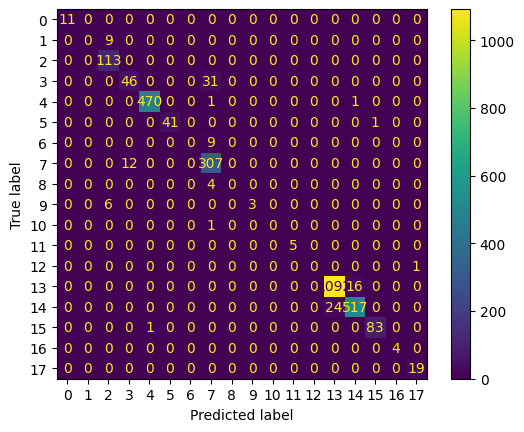

In [74]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [75]:
#Calculate accuracy, precision and recall for the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [76]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9586280056577087
Precision: 0.9509386302491677
Recall: 0.9586280056577087


Plot importances of each feature

In [77]:
# Create a series containing feature importances from the model and feature names from the training data
rf.feature_importances_

array([3.35447630e-06, 0.00000000e+00, 2.81196884e-06, ...,
       0.00000000e+00, 2.25846851e-07, 0.00000000e+00])

In [86]:
feature_importances = pd.Series(rf.feature_importances_, index=reference_data.var_names[reference_data.var_names.isin(common_features)]).sort_values(ascending=False)

# Get a dictionary mapping gene IDs to gene symbols
gene_id_to_symbol = dict(zip(reference_data.var_names, reference_data.var['feature_name']))

# Map gene IDs to gene symbols in the feature_importances Series
feature_importances.index = feature_importances.index.map(gene_id_to_symbol)

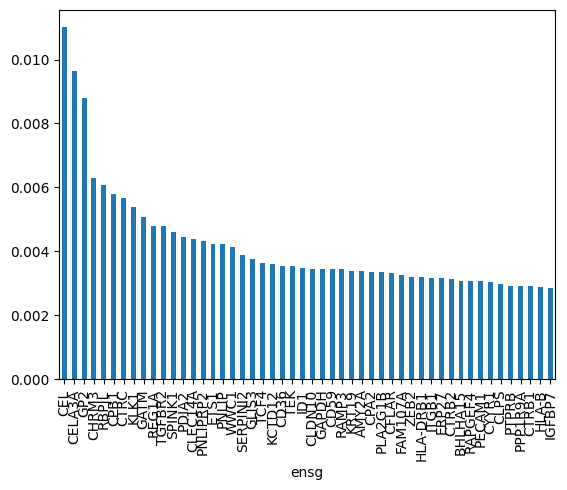

In [85]:
# Select the top N features
N = 50  # Specify the desired number of features
top_N_features = feature_importances.head(N)

# Plot the top N features
top_N_features.plot.bar();

# Predict labels for query dataset

In [97]:
reference_data

View of AnnData object with n_obs × n_vars = 14140 × 61757
    obs: 'donor_id', 'tissue_in_publication', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'assay_ontology_term_id', 'sample_id', 'replicate', '10X_run', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_type_ontology_term_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'ethnicity_original', 'scvi_leiden_res05_tissue', 'sample_number', 'organism_ontology_term_id', 'suspension_type', 'tissue_type', 'disease_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex

In [98]:
# Check for normalization:
print(reference_data.X.sum(axis=1))  # If values are all close to a specific number, it suggests normalization

# Check for log transformation:
print(reference_data.uns.get('log1p', None))  # If 'log1p' is present and True, it indicates log transformation

# Check for scaling:
print(reference_data.uns.get('scale_data', None))  # If 'scale_data' is present and True, it suggests scaling

[[2876.3657]
 [3466.3958]
 [3415.6426]
 ...
 [2579.503 ]
 [1085.8666]
 [1092.708 ]]
None
None


In [96]:
query_data

AnnData object with n_obs × n_vars = 3041 × 61757
    obs: 'predicted_cell_type'
    var: 'gene_ids', 'symbol'

In [87]:
y_predQ = rf.predict(query_data.X)

In [95]:
y_predQ.size

3041

In [88]:
# Add the predicted labels to the query AnnData object
query_data.obs['predicted_cell_type'] = y_predQ

<ipython-input-88-53d0c7542476>:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  query_data.obs['predicted_cell_type'] = y_predQ


In [99]:
# Count the number of cells types in predicted output
from collections import Counter

cell_type_counts = Counter(y_predQ)

# Print the counts:
for cell_type, count in cell_type_counts.items():
    print(f"{cell_type}: {count}")

pancreatic ductal cell: 1963
pancreatic acinar cell: 623
type B pancreatic cell: 9
pancreatic stellate cell: 139
endothelial cell: 29
pancreatic A cell: 269
macrophage: 7
CD8-positive, alpha-beta T cell: 2


In [89]:
query_data.obs

,predicted_cell_type
AAACCCAAGAGATTCA,pancreatic ductal cell
AAACCCAGTCACTGAT,pancreatic ductal cell
AAACGAAAGATGTTCC,pancreatic ductal cell
AAACGAAAGGCCATAG,pancreatic ductal cell
AAACGAAGTCGCATGC,pancreatic ductal cell
...,...
TTTGGTTCATACAGAA,pancreatic ductal cell
TTTGGTTGTATCGTAC,pancreatic ductal cell
TTTGGTTGTCCCTCAT,pancreatic A cell
TTTGTTGCAATAACCC,pancreatic acinar cell


# Hyperparameter tuning

In [ ]:
#Create parameters for Randomized search
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier()

In [ ]:
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

In [ ]:
# Fit the random search object to the data
rand_search.fit(X_train, y_train)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

In [ ]:
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
print('Best score:', rand_search.best_score_)

In [ ]:
best_rf

#Prediction

In [ ]:
!pip install matplotlib -q

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

In [ ]:
#Calculate accuracy, precision and recall for the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Plot importances of each feature

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [ ]:
# Plot a simple bar chart
feature_importances.plot.bar();